In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split

# Hard Margin SVM
$$\underset{w}{min}\frac{1}{2}\|w\|^{2}$$
$$st.\forall i, y_i(w.x+b)\geq 1$$

- I like starting with the algorithym and then working up to it so that it looks familiar when we finally derive it

# Soft Margin SVM
$$\underset{w,b,\xi_i \geq 0}{min}\quad\frac{1}{2}\|w\|^{2} + C\sum_{i=1}^{n}\xi_i$$
  
  
$$st.\forall i, y_i(w.x+b)\geq 1 -\xi_i $$

# SVM Application Example
- We see SVM application in spam filtering where our dependent variable $y_i \in \{-1,1\}$ namely not spam and spam.  
  
  
- Our class space $y$ is binary and thus this is a binary classification problem.  
   
   
- To do this classification we use linear models  
  
  
- So think in terms of a linear equation:

$$ f(x) =
  \begin{cases}
    +1       & \quad \text{if } w^{(1)}x^{(1)}+w^{(2)}x^{(2)}+ . . . + w^{(d)}x^{(d)} \geq \theta \\
    -1  & \quad \text{otherwise }
  \end{cases}
$$

- We will predict that the email is spam if the weighted combination of words in the document (independent varialbes $x$) is greater than some threshold ($\theta$) theta, otherwise we will predict not spam.   
  
  
- Notably, our decision boundary is linear. 
  
  
- Therefore we want to find our blue line below where $w.x = \theta$  
  
  
- If our weighted function is positive (follows the red line direction) we make one prediction and vis versa.  
  
  
- Our goal is to find $w$ such that our line $w.x = \theta$ separates spam from non-spam

##### Linear Classifier

- Each feature has a weight $w_i$ associated with it  
  
  
- Our prediction is based upon the weighted sum: $$f(x) = \sum_{i}^{n}w^{(i)}x^{(i)} = w.x$$

If $f(x)$ is:
- Positive we predict +1
- Negative we predict -1

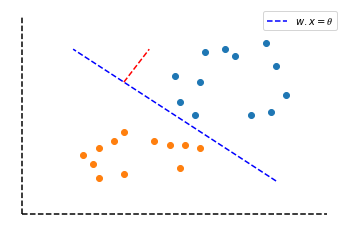

In [4]:
x = [3.5,4,5,4.5,3,4.2,4.8,5.2,3.6,4.9,3.1,3.4]
y = [4,5,4.5,3,4.2,4.8,5.2,3.6,4.9,3.1,3.4,3]

x_2 = [1.5,2,1.5,3.5,2,1.2,1.8,3.2,2.6,2.9,3.1,1.4]
y_2 = [2,2.5,1.1,2,1.2,1.8,2.2,2.1,2.2,2.1,1.4,1.5]

plt.plot([0,6],[0,0],'k--')
plt.plot([0,0],[0,6],'k--')
plt.scatter(x,y)
plt.scatter(x_2,y_2)
plt.plot([5,1],[1,5],'b--',label ='$w.x = 𝜃$')
plt.axis('off')
plt.plot([2,2.5],[4,5],'r--')
plt.legend()

# What is the Best Linear Separator (defined by w)?
- The distance from the separating hyperplane corresponds to the confidence of predictions.  
  
  
- We are more sure about the predictions of dot points further away from our hyperplane

- Is the red, green or blue plane the best seperator?

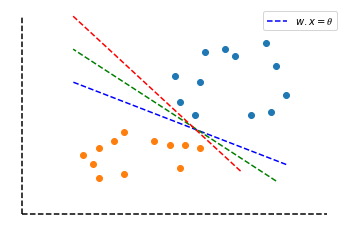

In [5]:
x = [3.5,4,5,4.5,3,4.2,4.8,5.2,3.6,4.9,3.1,3.4]
y = [4,5,4.5,3,4.2,4.8,5.2,3.6,4.9,3.1,3.4,3]

x_2 = [1.5,2,1.5,3.5,2,1.2,1.8,3.2,2.6,2.9,3.1,1.4]
y_2 = [2,2.5,1.1,2,1.2,1.8,2.2,2.1,2.2,2.1,1.4,1.5]

plt.plot([0,6],[0,0],'k--')
plt.plot([0,0],[0,6],'k--')
plt.scatter(x,y)
plt.scatter(x_2,y_2)
plt.plot([5.2,1],[1.5,4],'b--',label ='$w.x = 𝜃$')
plt.plot([5,1],[1,5],'g--')
plt.plot([4.3,1],[1.3,6],'r--')
plt.axis('off')

plt.legend()

# Largest Margin 
- This is were SVM gets its nickname large margin classifier  
  
  
- Denoted by $\gamma$: Our margin is defined by the distance of the closest example from the decision line/hyperplane  
  
  
- We can see that the first plot below has a larger margin $\gamma$ meaning the distance to the closest data point is larger than in plot two  
  
  
- The points with the smallest margins are the ones closest to the decision boundary Below. these are the two points that lie on the dashed green lines parallel to the decision boundary.  
  
  
- Thus, only two points corresponding to these two training examples—will be non-zero at the optimal solution to our optimization problem. These two points are called the support vectors in this problem. 

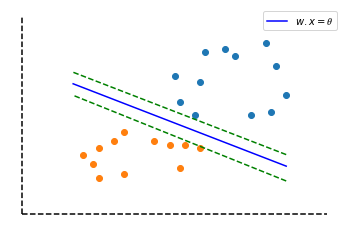

In [6]:
plt.plot([0,6],[0,0],'k--')
plt.plot([0,0],[0,6],'k--')
plt.scatter(x,y)
plt.scatter(x_2,y_2)
plt.plot([5.2,1],[1.45,3.95],'b',label ='$w.x = 𝜃$')
plt.plot([5.2,1],[1,3.6],'g--')
plt.plot([5.2,1],[1.8,4.3],'g--')
plt.axis('off')
plt.legend()

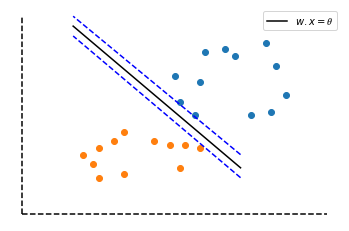

In [7]:
plt.plot([0,6],[0,0],'k--')
plt.plot([0,0],[0,6],'k--')
plt.scatter(x,y)
plt.scatter(x_2,y_2)
plt.plot([4.3,1],[1.4,5.7],'black',label ='$w.x = 𝜃$')
plt.plot([4.3,1],[1.1,5.4],'b--')
plt.plot([4.3,1],[1.8,6],'b--')
plt.axis('off')

plt.legend()


### Linear Algebra
- The value of the dot product of $A.B$ is simply the length of A times the length of B times by the angle between them:

$$A.B = \|A\|\|B\|cos\theta$$

- We take A and project it down to B and the length of this projection is simply the length of A times the cosine of the angle multiplied by the length of B   
  
  
- It is measured in the units of the length of B


###### Linear Projection

Projection equation:
$$ (b-a\beta)$$

- $\beta$ is our scaler and the point is that we want a scaled version of this line to be as close to b without leaving the line. Therefore, the closest point would be where $b$ meets $a$ at a 90 degree angle.

If **b** is orthogonal/perpendicular to **$a\beta$** we know that their dot prodict must equal zero:
$$ a^{T}(b-a\beta) = 0$$
$$ a^{T}b - a^{T}a\beta = 0$$
$$ a^{T}a\beta = a^{T}b $$

Because we are dealing with dot products of vectors we can divide them (cannot divide matrices):

$$ \beta = \frac{a^{T}b}{a^{T}a} $$


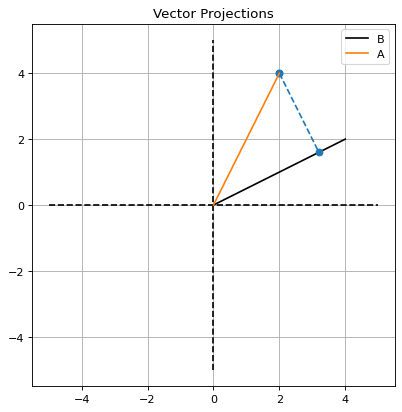

In [8]:
a = np.array([4,2])
b = np.array([2,4])
plt.figure(figsize=(8, 6), dpi=80)
beta = (a.T@b) / (a.T@a)
plt.plot([0,a[0]],[0,a[1]],'black',label = 'B')
plt.scatter(b[0],b[1])
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'o--')
plt.plot([-5,5],[0,0],'k--')
plt.plot([0,0],[-5,5],'k--')
plt.plot([0,2],[0,4],label = 'A')
plt.grid()
plt.axis('square')
plt.title('Vector Projections')
plt.legend()

# Our Margin
- Our Line: $$w.x+b= w^{(1)}x^{(1)}+w^{(2)}x^{(2)} + b = 0$$

- Point A: $x_A^{(1)},x_A^{(2)}$  denoted by the blue dot [x = 2,y = 4]
    
    
- w vector: $w = w^{(1)},w^{(2)} $  green line
    
    
- Point M which is an arbitrary point that lays on the line: $x_M^{(1)},x_M^{(2)}$
  
  
- We would like to find the distance between A and our Line namely what is the distance of that projection:   
  
  
$$d(A,L) = |AH|$$

$$|(A-M).w|$$

- Where H is the point at which A is perpendicular to L denoted by the lower blue dot  
  
  

- Since M belongs to the Line M = -b  
  
  

- Therefore, the distance of point A and the Line is simply the orthogonal vector w dotted with A plus the offset term b:

$$= w.A+b$$

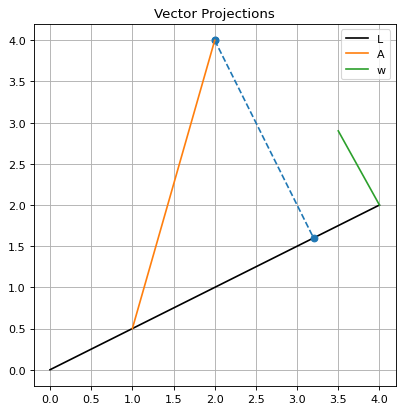

In [9]:
a = np.array([4,2])
b = np.array([2,4])
plt.figure(figsize=(8, 6), dpi=80)
beta = (a.T@b) / (a.T@a)
plt.plot([0,a[0]],[0,a[1]],'black',label = 'L')
plt.scatter(b[0],b[1])
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'o--')
plt.plot([1,2],[0.5,4],label = 'A')
plt.plot([4,3.5],[2,2.9],label = 'w')
plt.grid()
plt.axis('square')
plt.title('Vector Projections')
plt.legend()

## Largest Margin

So how will we use this knowledge of porjections to form our classification algorithym?

Prediction : $sign(w.x+b)$ 

- Prediction is base upon whether sign is positive/negative

Confidence : $(w.x+b)y$
    
Confidence in our prediction for i-th datapoint: 
    $\gamma_i = (w.x+b)y_i$
    
- It is the confidence in our prediction times the class $y_i$ of that prediction  
  
  
- If confidence is negative and class is negative then we get positive  
  
  
- If confidence is negative and class is positive then we get negative  
  
  
- Misclassification will result in negative sign

#### What do we want to solve
- We want to find w (the separating hyperplane) such that all our training data has a margin that is as large as possible
$$\underset{w}{max}\ \underset{i}{min} \gamma_i$$

- Find w where the smallest margin is as large as possible 

$$\underset{w,y}{max}\ \gamma $$
$$st.\forall i, y_i(w.x+b)\geq \gamma$$

- Find w that Maximizes our margin $\gamma$ 
- Such that (s.t) 
- For all our training examples ($\forall i$) 
- The margin of our training example $y_i(w.x+b)$ is atlest $\gamma$

###### Maximising $\gamma$
- We want to find a line that maximizes the distance of our closest points to the line (margin)  
  
  
- This line is defined by a few points that are the closest and these make up our Support Vectors  
  
  
- The seperating hyperplane is defined by only those support vectors. 

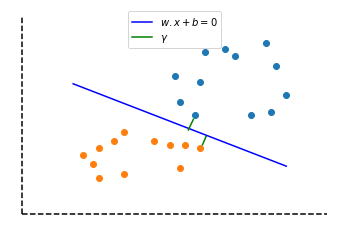

In [10]:

plt.plot([0,6],[0,0],'k--')
plt.plot([0,0],[0,6],'k--')
plt.scatter(x,y)
plt.scatter(x_2,y_2)
plt.plot([5.2,1],[1.45,3.95],'b',label ='$w.x+b = 0$')
plt.plot([3.27,3.37],[2.55,2.87],'g',label = '$\gamma$')
plt.plot([3.55,3.62],[2.1,2.35],'g')

plt.axis('off')
plt.legend()

# How do we find the vector w that maximises our margin?
#### Canonical Hyperplane problem
- Arbitrarly scaling our weight vector results in our margin also increasing.
$$(w.x+b)y = \gamma$$
$$(2w.x+2b)y = 2\gamma$$

- The solution is to normalize our w such that:

$$\gamma = (\frac{w}{\|w\|}.x+b)y$$


$$\|w\| = \sqrt{\sum_{i=1}^{d}(w^{(j)})^{2}}$$


- We will also require that our support vector $x_j$ will be on the plane defined by w such that:

$$w.x_j+b = \pm 1$$

- Since we have normalized $w$ the length of the margin on either side is $\frac{w}{\|w\|}$ (unit length One)

#### Canonical Hyperplane Solution

- We still want to maximize our margin $\gamma$  

 
 
- What do we know about $x_1$ relationship to $x_2$:

$$x_1 = x_2+2\gamma \frac{w}{\|w\|}$$

- $2\gamma \frac{w}{\|w\|}$ comes from the fact that either side of the margin is $\frac{w}{\|w\|}$ denoted in terms of our margin $\gamma$  
  
  

- We also know that our support vector lay on the lines:
$$w.x_1+b =-1$$
$$w.x_2+b =1$$

- Solving our simulataneous equation:
$$w.x_1+b =-1$$
$$x_1 = x_2+2\gamma \frac{w}{\|w\|}$$

$$= w(x_2 + 2\gamma \frac{w}{\|w\|}) +b = 1$$
  
$$= w.x_2 +b + 2\gamma \frac{w.w}{\|w\|}) = 1$$

- $w.x_2 +b$ we know is just equal to -1

$$\gamma = \frac{\|w\|}{w.w} = \frac{1}{\|w\|} $$

(-0.25, 5.25, -0.25, 5.25)

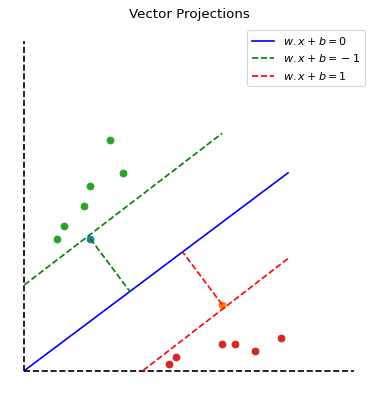

In [11]:
a = np.array([4,3])
b = np.array([1,2])
c = np.array([3,1])

a_1 = [0.5,1,1.5,0.6,0.9,1.3]
a_2 = [2,2.8,3,2.2,2.5,3.5]

b_1 = [2.2,2.3,3.5,3,3.2,3.9]
b_2 = [0.1,0.2,0.3,0.4,0.4,0.5]

plt.figure(figsize=(8, 6), dpi=80)
beta = (a.T@b) / (a.T@a)
beta_2 = (a.T@c) / (a.T@a)

plt.plot([0,a[0]],[0,a[1]],'b',label = "$w.x+b = 0$")
plt.scatter(b[0],b[1])
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'g--')

plt.scatter(c[0],c[1])
plt.plot([c[0], beta_2*a[0]],[c[1], beta_2*a[1]],'r--')

plt.plot([0,5],[0,0],'k--')
plt.plot([0,0],[0,5],'k--')

plt.plot([0,3],[1.3,3.6],'g--',label = "$w.x+b = -1$")
plt.plot([1.8,4],[0,1.7],'r--',label = "$w.x+b = 1$")
plt.scatter(a_1,a_2)
plt.scatter(b_1,b_2)

plt.grid()
plt.axis('square')
plt.title('Vector Projections')
plt.legend()
plt.axis('off')

# Maximizing The Margin

- So we first start with our optimiztion problem
$$\underset{w,y}{max}\ \gamma $$
$$st.\forall i, y_i(w.x+b)\geq \gamma$$
  
  

- This stated that we want to find $w$ such that the margin is maximized and the margin is the distance of all the data points have the confidence greater than $\gamma$  
  
  
- However, we noted (Canonical problem) that this optimization problem can be solved trivially by making $w$ as large as possible, so this is not usefull  
  
  
- That is why we have normalized $w$

$$\underset{max}{\gamma}\approx max \frac{1}{\|w\|} \approx min \frac{1}{2}\|w\|^{2}$$

# Hard Margin SVM
$$\underset{w}{min}\frac{1}{2}\|w\|^{2}$$
$$st.\forall i, y_i(w.x+b)\geq 1$$

- We are trying to minimize $w$ such that it has the smallest length which is the same as maximizing the margin
  
  
- Such that forall our training examples they have a confidence greater than 1


# What do we do if we have Non-Linearly Separable data?

(-0.30000000000000004, 6.3, -0.30000000000000004, 6.3)

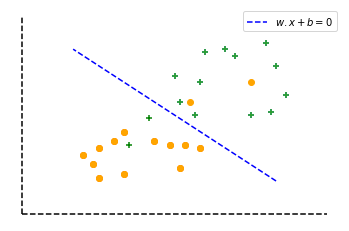

In [12]:
z = np.array([3.3,4.5])
m = np.array([3.4,4])

z_1 = np.array([2.5,2.1])
m_1 = np.array([2.9,2.1])

plt.plot([0,6],[0,0],'k--')
plt.plot([0,0],[0,6],'k--')
plt.scatter(x,y,marker= '+')
plt.scatter(x_2,y_2)
plt.plot([5,1],[1,5],'b--',label = "$w.x+b = 0$")
plt.scatter(x,y, marker = '+')
plt.scatter(x_2,y_2,color = 'orange')
plt.scatter(z,m,color = 'orange')
plt.scatter(z_1,m_1,color = 'green',marker = '+')
plt.legend()
plt.axis('off')

- If data is not separable we need to introduce a penalty  
  
  
- Meaning we want to allow for some margin violation  
  
  
- Therefore, we are still looking for a w that maximizes our margin by minimizing $\frac{1}{2}\|w\|^{2}$ whilst allowing for some margin violations

$$\underset{w}{min}\frac{1}{2}\|w\|^{2} + C(violations)$$
  
  
$$st.\forall i, y_i(w.x+b)\geq 1$$

# Soft Margin SVM
### How to Penalize Mistakes as not all Mistakes are equally bad

###### Slack Variable is introduced $\xi$

- Our goal is to find w, b and the slack varialbe $\xi$ such that the norm of w is small, meaning the margin is large plus the sum of the penalty (margin violations) $\xi$ is as small as possible  
  
  
- Such that the confidence in our classification is atlest 1 and if it is not one we subtract the value of $\xi$  
  
  
- When we correctly classify and our confidence is $\geq1$ we can set $\xi$ to 0

$$\underset{w,b,\xi_i \geq 0}{min}\quad\frac{1}{2}\|w\|^{2} + C\sum_{i=1}^{n}\xi_i$$
  
  
$$st.\forall i, y_i(w.x+b)\geq 1 -\xi_i $$

- The value of the slack varaible (penalty) will be the distance from the other side of the margin to the data point


(-0.25, 5.25, -0.25, 5.25)

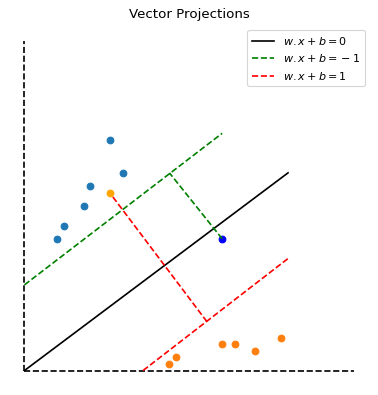

In [13]:
a = np.array([4,3])
b = np.array([1,2])
c = np.array([3,1])
d = np.array([1.3,2.7])
e = np.array([3,2])

a_1 = [0.5,1,1.5,0.6,0.9,1.3]
a_2 = [2,2.8,3,2.2,2.5,3.5]

b_1 = [2.2,2.3,3.5,3,3.2,3.9]
b_2 = [0.1,0.2,0.3,0.4,0.4,0.5]

plt.figure(figsize=(8, 6), dpi=80)
beta = (a.T@b) / (a.T@a)
beta_2 = (a.T@c) / (a.T@a)

plt.plot([0,a[0]],[0,a[1]],'black',label = "$w.x+b = 0$")
#plt.scatter(b[0],b[1])
#plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'g--')

#plt.scatter(c[0],c[1])
#plt.plot([c[0], beta_2*a[0]],[c[1], beta_2*a[1]],'r--')

plt.plot([0,5],[0,0],'k--')
plt.plot([0,0],[0,5],'k--')

plt.plot([0,3],[1.3,3.6],'g--',label = "$w.x+b = -1$")
plt.plot([1.8,4],[0,1.7],'r--',label = "$w.x+b = 1$")
plt.scatter(a_1,a_2)
plt.scatter(b_1,b_2)
plt.scatter(1.3,2.7,color = 'orange')
plt.scatter(3,2,color = 'blue')


plt.plot([2.77,1.33],[0.74,2.65],'r--')
plt.plot([3,2.2],[2,3],'g--')

plt.grid()
plt.axis('square')
plt.title('Vector Projections')
plt.legend()
plt.axis('off')

# Natural Form of SVM

$$\underset{w,b}{argmin}\quad\frac{1}{2}\|w\|^{2} + C\sum_{i=1}^{n}max\{0,1-y_i(w.x_i+b)\}$$
  
  
$$st.\forall i, y_i(w.x+b)\geq 1 -\xi_i $$

- Our goal is to find b,w such that our margin is maximized by minimizing $\frac{1}{2}\|w\|^{2}$  
  
  
- $C$ is our regularization term. How much are we allowing margin violations  
  
  
- $max\{0,1-y_i(w.x_i+b)\}$: empirical loss L (how well are we fitting our training data)  
  
  
- The left part $\frac{1}{2}\|w\|^{2}$ is trying to max the margin i.e find a good separator while the right side is trying to fit the data as best as possible and the cost of how well we are fitting the data is our empirical loss

### Hinge Loss
- Standard 0/1 loss results in a misclassification being penalized by 1 and a correct classification receiving 0.  
  
  
- Hinge loss has a hinge at 1 meaning a correct classification (point away from the margin) then we obtain the loss of 0  
  
  
- If classified correctly but within the margin (i.e too close to the margin or on the wrong side of the margin) then we are incurring a penalty proportional to how far away our point is from decision boundary. We can see as the red dotted line below cross the y axis this miscalssification is on the wrong side of the margin and the futher away the higher the line increases i.e the higher the penalty.
  
  

- SVM is optimizing this hinge loss in the $max\{0,1-y_i(w.x_i+b)\}$  
  
  
- Since $\|w\|^{2}$ this is a quadratic objective function and the standard way to solve this is with a quadratic solver software (generally slow and innefficient for large data).

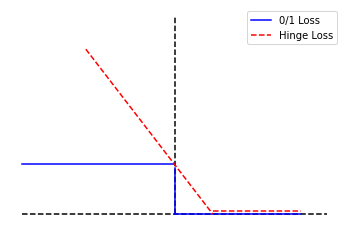

In [19]:
plt.plot([-6,6],[0,0],'k--')
plt.plot([0,0],[0,6],'k--')
plt.plot([-6,0],[1.5,1.5],'b')
plt.plot([0,0],[0,1.4],'b', label = '0/1 Loss')
plt.plot([0,5],[0,0],'b')
plt.plot([-3.5,1.5],[5,0],'r--')
plt.plot([1.5,5],[0.1,0.1],'r--',label = 'Hinge Loss')
plt.axis(False)
plt.legend()


In [21]:
 def calculate_cost(W, X, Y):
    # calculate hinge loss
        N = X.shape[0]
        distances = 1 - Y * (np.dot(X, W))
        distances[distances < 0] = 0  # equivalent to max(0, distance)
        hinge_loss = penalty * (np.sum(distances) / N)
    # calculate cost
        cost = 1 / 2 * np.dot(W, W) + hinge_loss
        return cost

# Gradient Descent
- Our function is a quadratic function and convex. Therefore, we can use gradient descent to min our function

$$f(w,b) = \frac{1}{2}\sum_{j=1}^{d}(w^{(j)})^{2} + C\sum_{i=1}^{n}max\{0,1-y_i(\sum_{j=1}^{d}w^{(j)}x^{(j)}_i+b)\}$$

- Find $w,b$ that minimizes our function
  
  
- Inncorrect classification is 1 - distance from the boundary:  
  
  
$$1-y_i(\sum_{j=1}^{d}w^{(j)}x^{(j)}_i+b)$$  
  
  
- Correct classification is 0  
  
  

- We want to compute the gradient with respect to our weight vector: $\nabla_j\text{ w.r.t }w^{(j)}$
  
$$\frac{\partial f(w,b)}{\partial w^{j}} \frac{1}{2}\sum_{j=1}^{d}(w^{(j)})^{2} = 2.\frac{1}{2}w^{(j)} = w^{(j)}$$

$$\nabla_j = \frac{\partial f(w,b)}{\partial w^{j}} = w^{(j)}+ C\sum_{i=1}^{n}\frac{\partial L(x_i,y_i)}{\partial w^{j}}$$

$$\frac{\partial L(x_i,y_i)}{\partial w^{j}} = 0 \quad \text{if } y_i(w^{(j)}x^{(j)}_i+b) \geq 1$$

$$ \text{otherwise } =  -y_ix^{(j)}_i$$

In [23]:
def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
        distance = 1 - (Y_batch * np.dot(X_batch, W))
        dw = np.zeros(len(W))
        for ind, d in enumerate(distance):
            if max(0, d) == 0:
                di = W
            else:
                di = W - (2 * Y_batch[ind] * X_batch[ind])
            dw += di
        dw = dw/len(Y_batch)  # average
        self.dw = dw
        return dw

# Lagrange Multipliers
###### Idea:

- Suppose we have a function $f(x,y) = z$ we know this is a surface  
  
  
- suppose we have a contraint $g(x,y)=c$ as it is equal to a constant we know this is a level curve to some surface $g(x,y)=z$  
  
  
- If we take our function and set it equal to a constant $f(x,y) = c$ we have a whole set of level curves  
  
  
- For contrained optimization we have to be on the surface of $f(x,y) = c$ meaning we will be on these levels curves  
  
  
- We also have to be on the constraint $g(x,y)=c$ this specific level curve  
  
  
- We are looking where this specific level curve bounces of our function (constrained maxima or minima)  
  
  
- We know that these functions tangents at the point of bouncing off are parrallel  
  
  
- Parrallel Tangents and therefore Parrallel Normals  
  
  
- The gradient of a Surface gives us normals to the level curves


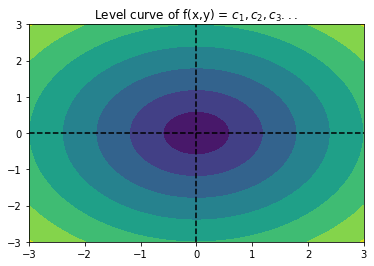

In [15]:

xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
#fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Level curve of f(x,y) = $c_1,c_2,c_3...$')
#ax.set_xlabel('x (cm)')
ax.plot()


ax.plot([-3,3],[0,0],'k--')
ax.plot([0,0],[-3,3],'k--')
plt.show()


###### If two points intersect and bounce off one another then they share a common tangent or atleast their tangents are scaler multiples
- If they share the same tangent then they also have the same normals or atleast the normals are scaler multiples

### The normals of the level curves are scaler multiples
$$\underset{f(x,y)}{NORMALS} = k.\underset{g(x,y)}{NORMALS}$$

- What gives us normals to level curves? (gradient)

$$\nabla f(x,y) = k. \nabla g(x,y)$$

- What is the scaler k defined as?

$$\nabla f(x,y) = \lambda \nabla g(x,y)$$

- Lambda $\lambda$ is what we define as the Lagrange Multiplier  
  
  
- Scaler multiple i.e Lagrange multiple/ier  
  
  
- Since gradients give us normals of level curves we can extrapolate the same formula for multidimentional functions

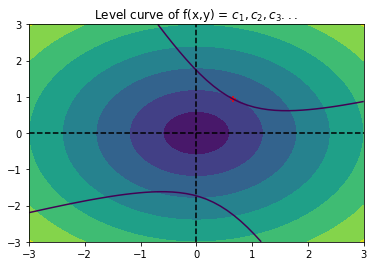

In [16]:

x=np.linspace(3,-3,50)

y=np.linspace(3,-3,50)

x,y=np.meshgrid(x,y)
z=-x**2-2*-x*y+y**2-2*-x
levels=[3]
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
#fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Level curve of f(x,y) = $c_1,c_2,c_3...$')
#ax.set_xlabel('x (cm)')
ax.contour(x,y,z,levels)
ax.scatter([0.66],[0.95],marker = '+',color = 'red')

ax.plot([-3,3],[0,0],'k--')
ax.plot([0,0],[-3,3],'k--')
plt.show()

# Lagrange Duality and contstrained optimization problems
$$\underset{x}{min}f(x)$$
$$\text{s.t. } g_i(x) = 0$$

- In this function our Lagrangian would be:
$$L(w,\beta) = f(x) +\sum_{i=1}^{l}\beta_i g_1(w)$$

- Here our $\beta_i$ are our Lagrangian Multipliers  
  
  
- We then set $L’s$ partial derivatives to zero and solve for $x,\beta$
$$\frac{\partial L}{\partial x_i} = 0; \frac{\partial L}{\partial \beta_i} = 0$$



# Optimal Margin Classifier
- The (primal) optimization problem for finding the optimal margin classifier:
$$\underset{w,b,\gamma}{min} \frac{1}{2}\|w\|^{2}$$
$$st.y_i(w.x^{(i)}+b)\geq 1$$

- Our contraint can be written as :
$$g_i(x) = −y^{(i)}(w.x^{(i)} + b) +1 \leq 0$$


- Our goal is to write our algorithm in terms of only the inner product between points in the input feature space.  
  
  
- The fact that we can express our algorithm in terms of these inner products will be key when we apply the kernel trick.

$$\langle x^{(i)},x^{(j)}\rangle$$

- Consturcting our Largrange optimization problem:

$$L(w,b,\alpha) = \frac{1}{2}\|w\|^{2} - \sum_{i=1}^{m}\alpha [y^{(i)}(w.x^{(i)} + b) -1]$$

- Now taking the partial derivatives:
$$\nabla_w L(w,b,\alpha) = w - \sum_{i=1}^{m}\alpha_i y^{(i)}x^{(i)} $$

- This implies that $w$:

$$w = \sum_{i=1}^{m}\alpha_i y^{(i)}x^{(i)} $$

- derivative with respect to $b$:

$$\frac{\partial}{\partial b}L(w,b,\alpha) = \sum_{i=1}^{m}\alpha_i y^{(i)} = 0 $$

- Taking these two derivatives and plugging them into our Largrange optimization problem:  

$$L(w,b,\alpha) = \sum_{i=1}^{m}\alpha_i - \frac{1}{2}\sum_{i,j=1}^{m}y^{(i)}y^{(j)}\alpha_i \alpha_j (x^{(i)})^{T}x^{(j)} - b \sum_{i=1}^{m}\alpha_i y^{(i)} $$  


- Since $b$ is equal to zero and $(x^{(i)})^{T}x^{(j)}$ can be written as $\langle x^{(i)},x^{(j)}\rangle$:  

$$L(w,b,\alpha) = \sum_{i=1}^{m}\alpha_i - \frac{1}{2}\sum_{i,j=1}^{m}y^{(i)}y^{(j)}\alpha_i \alpha_j \langle x^{(i)},x^{(j)}\rangle$$

## Dual Optimization Problem
- If we have found our $\alpha$'s, in order to make a prediction we only have to calculate a quantity that depends on the inner product between x and the points in the training set.   
  
  
- Since our $\alpha$'s will all be zero except for the support vectors many of the terms in the sum below will be zero, and we really need to find only the inner products between x and the support vectors (of which there is often only a small number) in order to make our prediction.  
  
  
- The dual form of the optimization problem, allows us to write the entire algorithm in terms of only inner products between input feature vectors. The resulting algorithm will be able to efficiently learn in very high dimensional spaces.

$$\underset{\alpha}{max} \text{ }W(\alpha) = \sum_{i=1}^{m}\alpha_i - \frac{1}{2}\sum_{i,j=1}^{m}y^{(i)}y^{(j)}\alpha_i \alpha_j \langle x^{(i)},x^{(j)}\rangle$$

$$st.\alpha_i \geq 0$$

$$\sum_{i=1}^{m}\alpha_i y^{(i)} = 0 $$

- Since we worked out that:
$$w = \sum_{i=1}^{m}\alpha_i y^{(i)}x^{(i)} $$

$$w^{T}x+b = (\sum_{i=1}^{m}\alpha_i y^{(i)}x^{(i)})^{T} x+b$$

- Our predictions can now be written as:

$$\sum_{i=1}^{m}\alpha_i y^{(i)}\langle x^{(i)},x\rangle +b$$

# Python Implementation

In [70]:

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)